In [43]:
# Alexander Rasho
# Hamesh Sharma
# Alexander Truong

import pandas
import sklearn.preprocessing

# bank.csv from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

bank = pandas.read_csv('bank.csv', sep=';')

# Ordinal features
#
# Note: month probably shouldn't be ordinal.
# Then again, neither should day.

boolean = { 'no': 0.0, 'yes': 1.0 }
months = {
    'jan': 1.0, 'feb': 2.0, 'mar': 3.0, 'apr': 4.0,  'may': 5.0,  'jun': 6.0,
    'jul': 7.0, 'aug': 8.0, 'sep': 9.0, 'oct': 10.0, 'nov': 11.0, 'dec': 12.0
}

bank.replace({
    'default': boolean,
    'housing': boolean,
    'loan':    boolean,
    'month':   months,
    'y':       boolean
}, inplace=True)

# Categorical features
#
# Since we plan to use logistic regression, add drop_first=True
# to use dummy instead of one-hot encoding

categorical = ['job', 'marital', 'education', 'contact', 'poutcome']
bank = pandas.get_dummies(bank, columns=categorical, prefix=categorical, drop_first=True)

# Numeric features
#
# Standardized because we plan to use KNN and SVM 

scaled = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']
bank[scaled] = sklearn.preprocessing.scale(bank[scaled].astype(float))

# Training set and targets

X = bank.drop(columns='y').values
t = bank['y'].values

In [7]:
# Number 2

from sklearn.model_selection import train_test_split

# Train, Test, and Split data
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2)

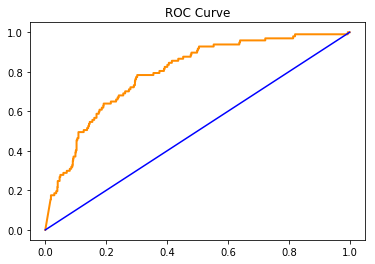

The score is: 0.8419889502762431
The confusion matrix is:
 [[714  94]
 [ 49  48]]
The roc_auc_score is: 0.7949882617127693


In [8]:
# Number 3
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

clf = GaussianNB()
clf.fit(X_train, t_train)
prediction = clf.predict(X_test)
score = clf.score(X_test, t_test)
conf_matrix = confusion_matrix(t_test, prediction)

pred_prob_t = clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(t_test, pred_prob_t)
fpr, tpr, thresholds = roc_curve(t_test, pred_prob_t)

plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.title("ROC Curve")
plt.plot([0,1],[0,1], 'b')
plt.show()

print("The score is:", score)
print("The confusion matrix is:\n", conf_matrix)
print("The roc_auc_score is:", roc_score)

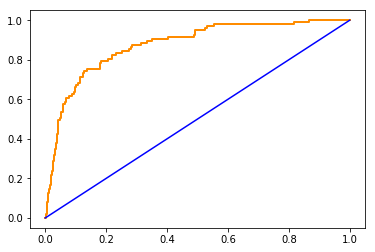

0.8972375690607735

In [9]:
# Number 4

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', fit_intercept=False)
X_train, X_train_lr, t_train, t_train_lr = train_test_split(X_train, t_train, test_size=0.2)
lr.fit(X_train_lr, t_train_lr)
pred_prob_t_lr = lr.predict_proba(X_test)[:,1]
fpr_rt_lm, tpr_rt_lm, thresholds_lm = roc_curve(t_test, pred_prob_t_lr)

plt.plot(fpr_rt_lm, tpr_rt_lm, color='darkorange', lw=2)
plt.plot([0,1],[0,1], 'b')
plt.show()

print("The score is:", lr.score(X_test, t_test))

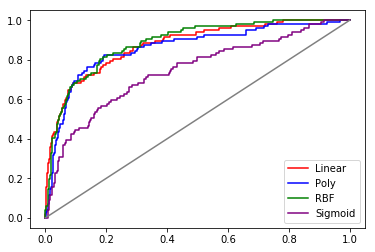

0.912707182320442
0.8994475138121547


In [11]:
# Number 5 Linear

from sklearn.svm import SVC

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2)

svc_linear = SVC(kernel='linear', probability=True, gamma='auto')
svc_score_linear = svc_linear.fit(X_train, t_train).decision_function(X_test)
fpr_lin, tpr_lin, thresholds = roc_curve(t_test, svc_score_linear)

svc_poly = SVC(kernel='poly', probability=True, gamma='auto')
svc_score_poly = svc_poly.fit(X_train, t_train).decision_function(X_test)
fpr_poly, tpr_poly, thresholds = roc_curve(t_test, svc_score_poly)

svc_rbf = SVC(kernel='rbf', probability=True, gamma='auto')
svc_score_rbf = svc_rbf.fit(X_train, t_train).decision_function(X_test)
fpr_rbf, tpr_rbf, thresholds = roc_curve(t_test, svc_score_rbf)

svc_sigmoid = SVC(kernel='sigmoid', probability=True, gamma='auto')
svc_score_sigmoid = svc_sigmoid.fit(X_train, t_train).decision_function(X_test)
fpr_sig, tpr_sig, thresholds = roc_curve(t_test, svc_score_sigmoid)

plt.plot(fpr_lin, tpr_lin, label='Linear', color='red')
plt.plot(fpr_poly, tpr_poly, label='Poly', color='blue')
plt.plot(fpr_rbf, tpr_rbf, label='RBF', color='green')
plt.plot(fpr_sig, tpr_sig, label='Sigmoid', color='purple')
plt.plot([0,1],[0,1], 'grey')
plt.legend(loc="lower right")
plt.show()

Number 6.

The Scores indicate that the Logistic Regression model from Problem 4 as the best classifier.

In [42]:
from sklearn.metrics import auc
import numpy as np

trainCount0 = 0;
trainCount1 = 0;
testCount0 = 0;
for i in range (0,t_train.size):
    if t_train[i] == 0:
        trainCount0 += 1
    elif t_train[i] == 1:
        trainCount1 += 1

print("Training Count of 0s:", trainCount0)
print("Training Count of 1s:", trainCount1)
pred0 = np.zeros((t_test.size,))

for i in range (0, t_test.size):
    if t_test[i] == 0:
        testCount0 += 1
        
print("Accuracy of predicting 0:", testCount0/t_test.size) 

pred_prob_t_lr = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(t_test, pred_prob_t_lr)
roc_score = auc(fpr, tpr)
print("ROC AUC Score:", roc_score)
print("According to the ROC AUC Score,", 
      "our model is very good at predicting 0s.")

Training Count of 0s: 3210
Training Count of 1s: 406
Accuracy of predicting 0: 0.8729281767955801
ROC AUC Score: 0.8465822784810126
According to the ROC AUC Score, our model is very good at predicting 0s.
